In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
# load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [24]:
# training data / feature selection
X = train.drop(columns=['id', 'MedHouseVal']).values # input features
y = train['MedHouseVal'].values.reshape(-1,1) # target variable

In [25]:
# normalizing feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test.drop(columns=['id']))

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [27]:
# train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
# linear regression with gradient descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iters = 1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    def fit(self, X,y):
        m, n = X.shape
        self.weights = np.zeros((n, 1))
        self.bias = 0
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [33]:
# train the model
model = LinearRegressionGD(learning_rate=0.01, n_iters=1000)
model.fit(X_train, y_train)

In [34]:
# validate the model
y_val_pred = model.predict(X_val)

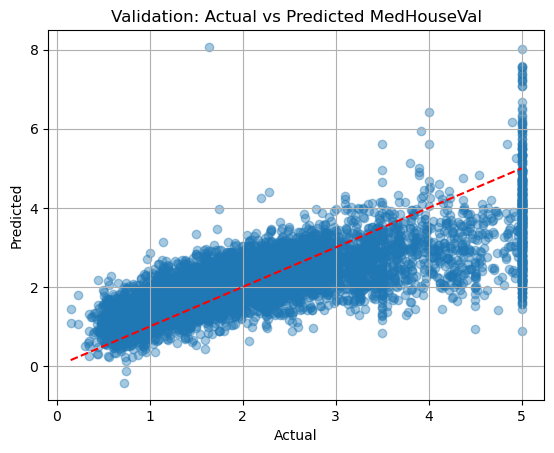

In [35]:
# visualisation
plt.scatter(y_val, y_val_pred, alpha=0.4)
plt.plot([y_val.min(), y_val.max()],[y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Validation: Actual vs Predicted MedHouseVal")
plt.grid(True)
plt.show()

In [36]:
# training on full dataset
model.fit(X_scaled, y)

In [37]:
# predict on test set
y_test_pred = model.predict(X_test_scaled)

In [38]:
# saving predictions
df_pred = pd.DataFrame({"MedHouseVal": y_test_pred.flatten()})
df_pred.to_csv("submission.csv", index=True, index_label="row_id")
print("submission.csv created")

submission.csv created


In [40]:
df_pred = pd.DataFrame({
    "id": test["id"],
    "MedHouseVal": y_test_pred.flatten()
})
df_pred.to_csv("submission1.csv", index=False)
print("submission1.csv created with correct format.")


submission1.csv created with correct format.
